In [1]:
import va_utils
import va_plots
import cantoria_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.25)
sns.color_palette("colorblind")
plt.rcParams.update({"figure.dpi": 300})

2023-12-18 02:21:44.701059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
sh: 1: load_ext: not found


In [2]:
holdout_sscs_metrics = pd.DataFrame()
holdout_cantoria_metrics = pd.DataFrame()

In [3]:
for model in range(6):
    if (model == 0):
        log_folder = 'mask_voas_cnn'
        model_name = 'MaskVoasCNN'
    elif (model == 1):
        log_folder = 'mask_voas_v2'
        model_name = 'MaskVoasCNNv2'
    elif (model == 2):
        log_folder = 'downsample_voas_cnn'
        model_name = 'DownsampleVoasCNN'
    elif (model == 3):
        log_folder = 'downsample_voas_v2'
        model_name = 'DownsampleVoasCNNv2'
    elif (model == 4):
        log_folder = 'voas_cnn_retreino'
        model_name = 'VoasCNN (Retreino)'
    elif (model == 5):
        log_folder = 'voas_cnn_original'
        model_name = 'VoasCNN (Original)'

    metrics_dir = './Evaluation_Data/' + log_folder + '_f-scores_treino1.h5'
    mix_metrics, sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)
    sop_metrics['F1-Score'] = sop_metrics['F-Measure']
    alto_metrics['F1-Score'] = alto_metrics['F-Measure']
    ten_metrics['F1-Score'] = ten_metrics['F-Measure']
    bass_metrics['F1-Score'] = bass_metrics['F-Measure']
    sop_metrics['Voz'] = 'Soprano'
    alto_metrics['Voz'] = 'Contralto'
    ten_metrics['Voz'] = 'Tenor'
    bass_metrics['Voz'] = 'Baixo'
    sop_metrics['Modelo'] = model_name
    alto_metrics['Modelo'] = model_name
    ten_metrics['Modelo'] = model_name
    bass_metrics['Modelo'] = model_name
    
    tmp_sscs_metrics = pd.concat([sop_metrics, alto_metrics, ten_metrics, bass_metrics])[['F1-Score', 'Voz', 'Modelo']]
    holdout_sscs_metrics = pd.concat([holdout_sscs_metrics, tmp_sscs_metrics]).reset_index(drop=True)

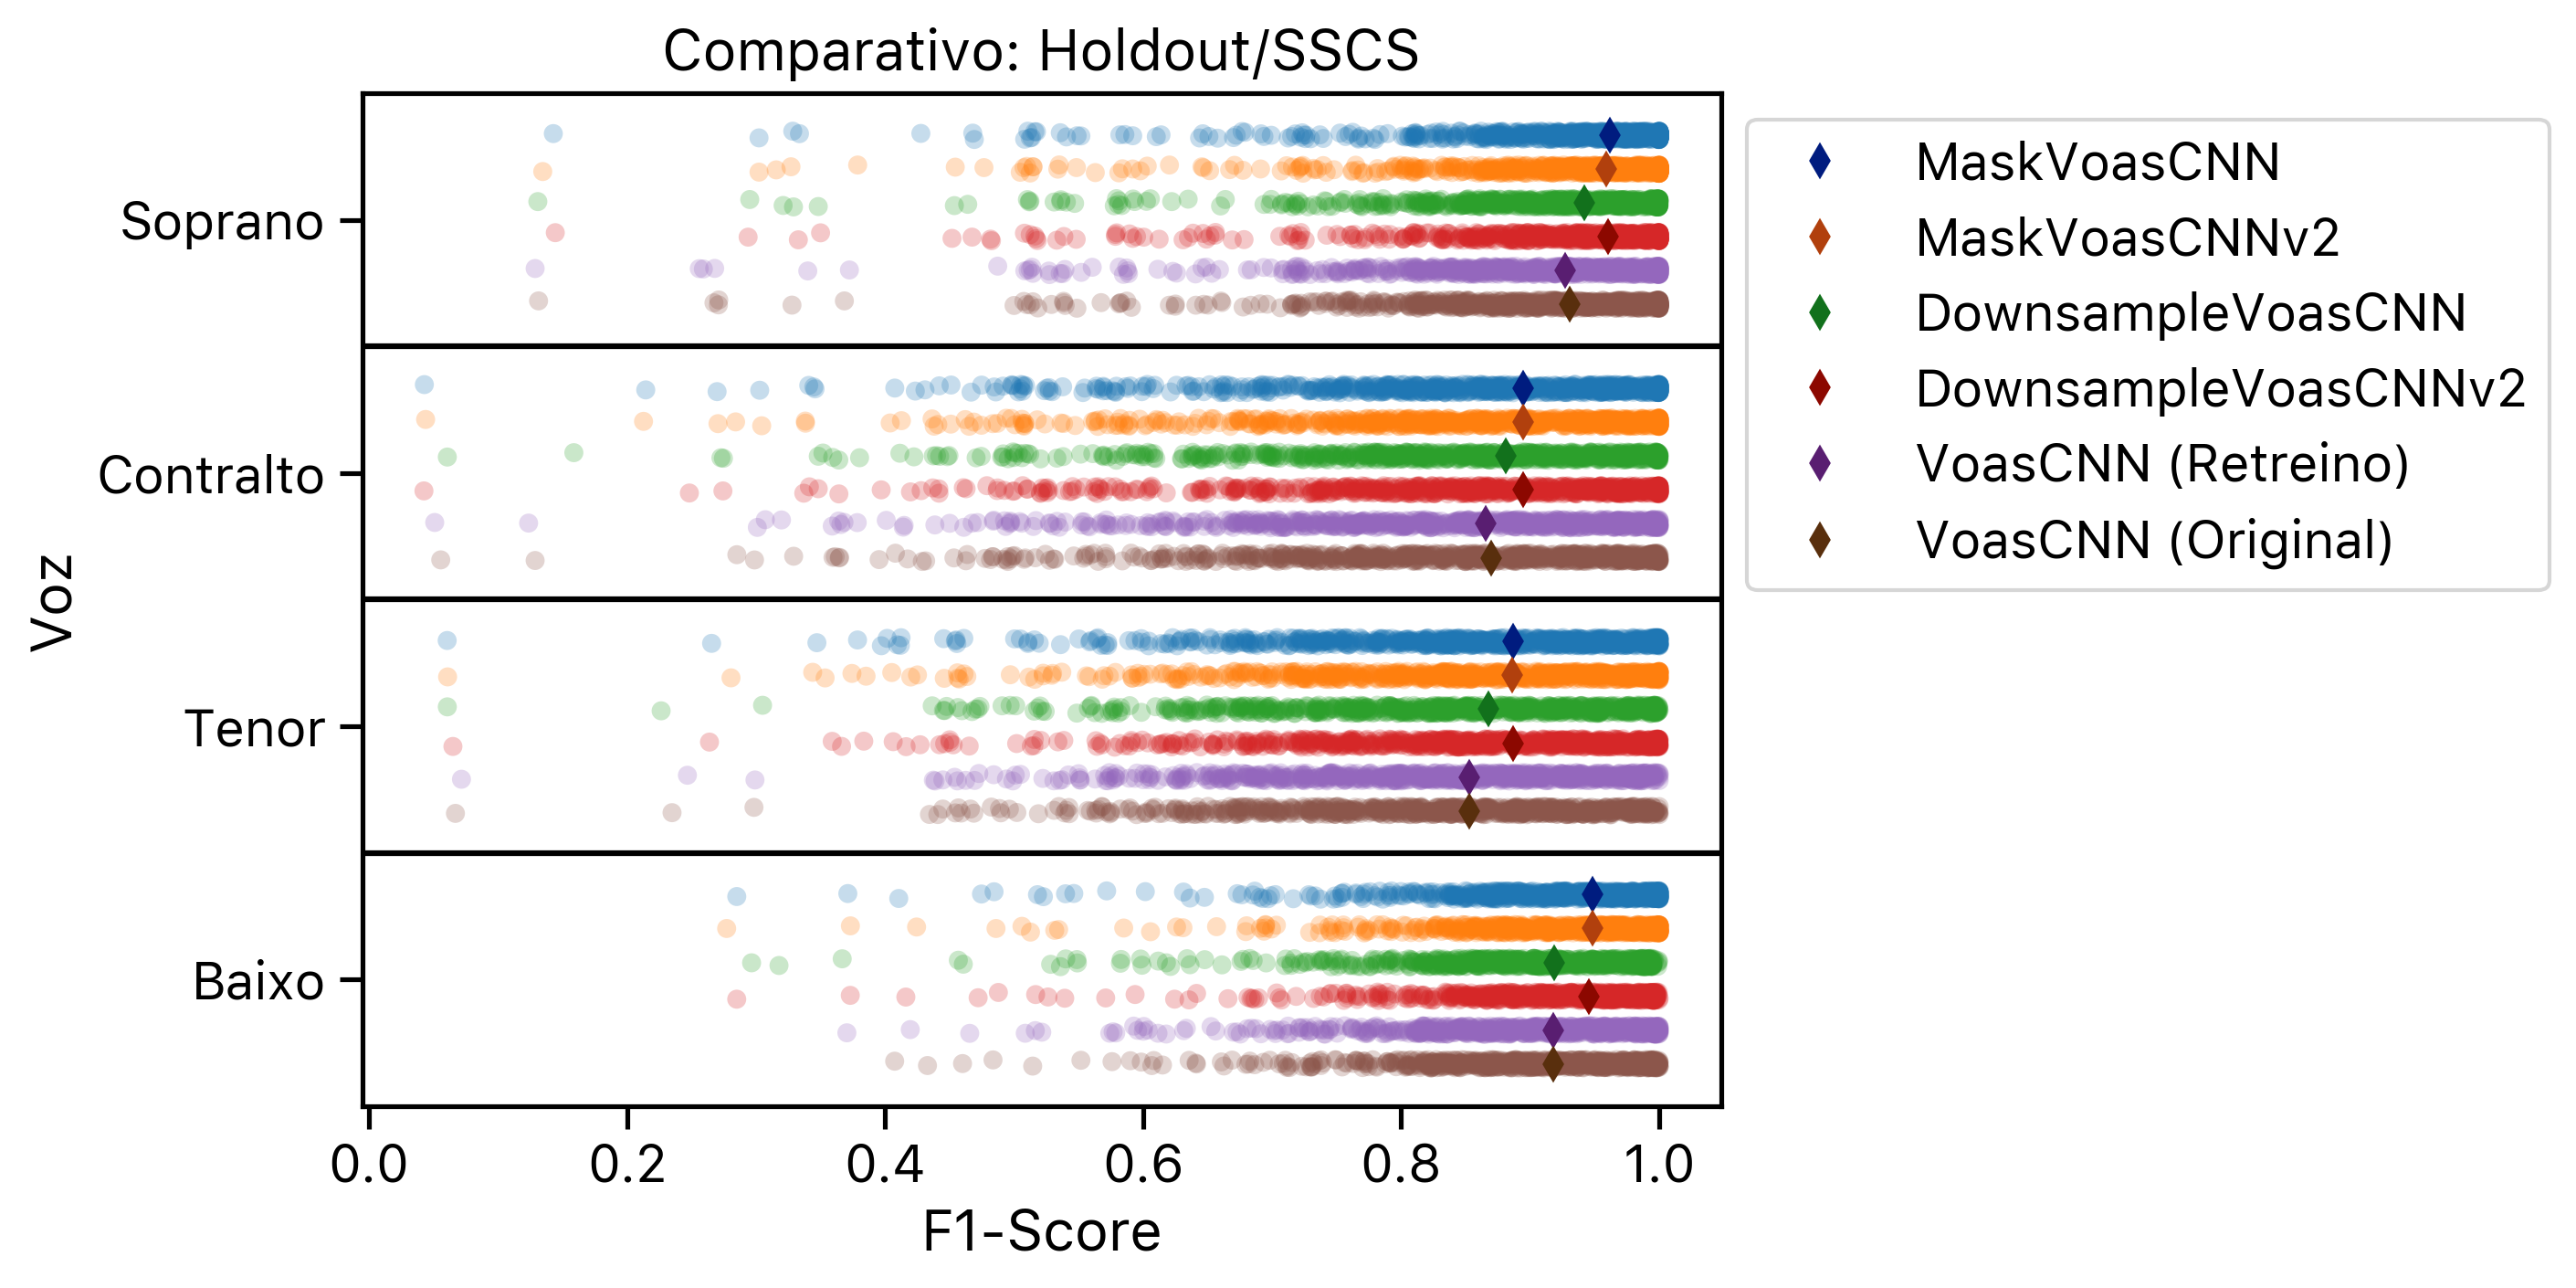

In [18]:
fig, ax = plt.subplots()

ax.set_title('Comparativo: Holdout/SSCS')

strip = sns.stripplot(
    data=holdout_sscs_metrics, x="F1-Score", y="Voz", hue="Modelo",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

point = sns.pointplot(
    data=holdout_sscs_metrics, x="F1-Score", y="Voz", hue="Modelo",
    dodge=.67, palette="dark", errorbar=None, estimator='median',
    markers="d", markersize=4, linestyle="none",
)

point.axhline(0.5, c='black')
point.axhline(1.5, c='black')
point.axhline(2.5, c='black')

plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [5]:
for model in range(6):
    if (model == 0):
        log_folder = 'mask_voas_cnn'
        model_name = 'MaskVoasCNN'
    elif (model == 1):
        log_folder = 'mask_voas_v2'
        model_name = 'MaskVoasCNNv2'
    elif (model == 2):
        log_folder = 'downsample_voas_cnn'
        model_name = 'DownsampleVoasCNN'
    elif (model == 3):
        log_folder = 'downsample_voas_v2'
        model_name = 'DownsampleVoasCNNv2'
    elif (model == 4):
        log_folder = 'voas_cnn_retreino'
        model_name = 'VoasCNN (Retreino)'
    elif (model == 5):
        log_folder = 'voas_cnn_original'
        model_name = 'VoasCNN (Original)'

    mix_df, sop_df, alto_df, ten_df, bass_df = cantoria_utils.compute_holdout_metrics(model)
    sop_df['F1-Score'] = sop_df['F-Measure']
    alto_df['F1-Score'] = alto_df['F-Measure']
    ten_df['F1-Score'] = ten_df['F-Measure']
    bass_df['F1-Score'] = bass_df['F-Measure']
    sop_df['Voz'] = 'Soprano'
    alto_df['Voz'] = 'Contralto'
    ten_df['Voz'] = 'Tenor'
    bass_df['Voz'] = 'Baixo'
    sop_df['Modelo'] = model_name
    alto_df['Modelo'] = model_name
    ten_df['Modelo'] = model_name
    bass_df['Modelo'] = model_name
    
    tmp_cantoria_metrics = pd.concat([sop_df, alto_df, ten_df, bass_df])[['F1-Score', 'Voz', 'Modelo']]
    holdout_cantoria_metrics = pd.concat([holdout_cantoria_metrics, tmp_cantoria_metrics]).reset_index(drop=True)


2023-12-18 02:21:50.553494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 02:21:50.558797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 02:21:50.559029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1/1 [==============================] - 1s 704ms/step


2023-12-18 02:21:51.740712: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 15ms/step


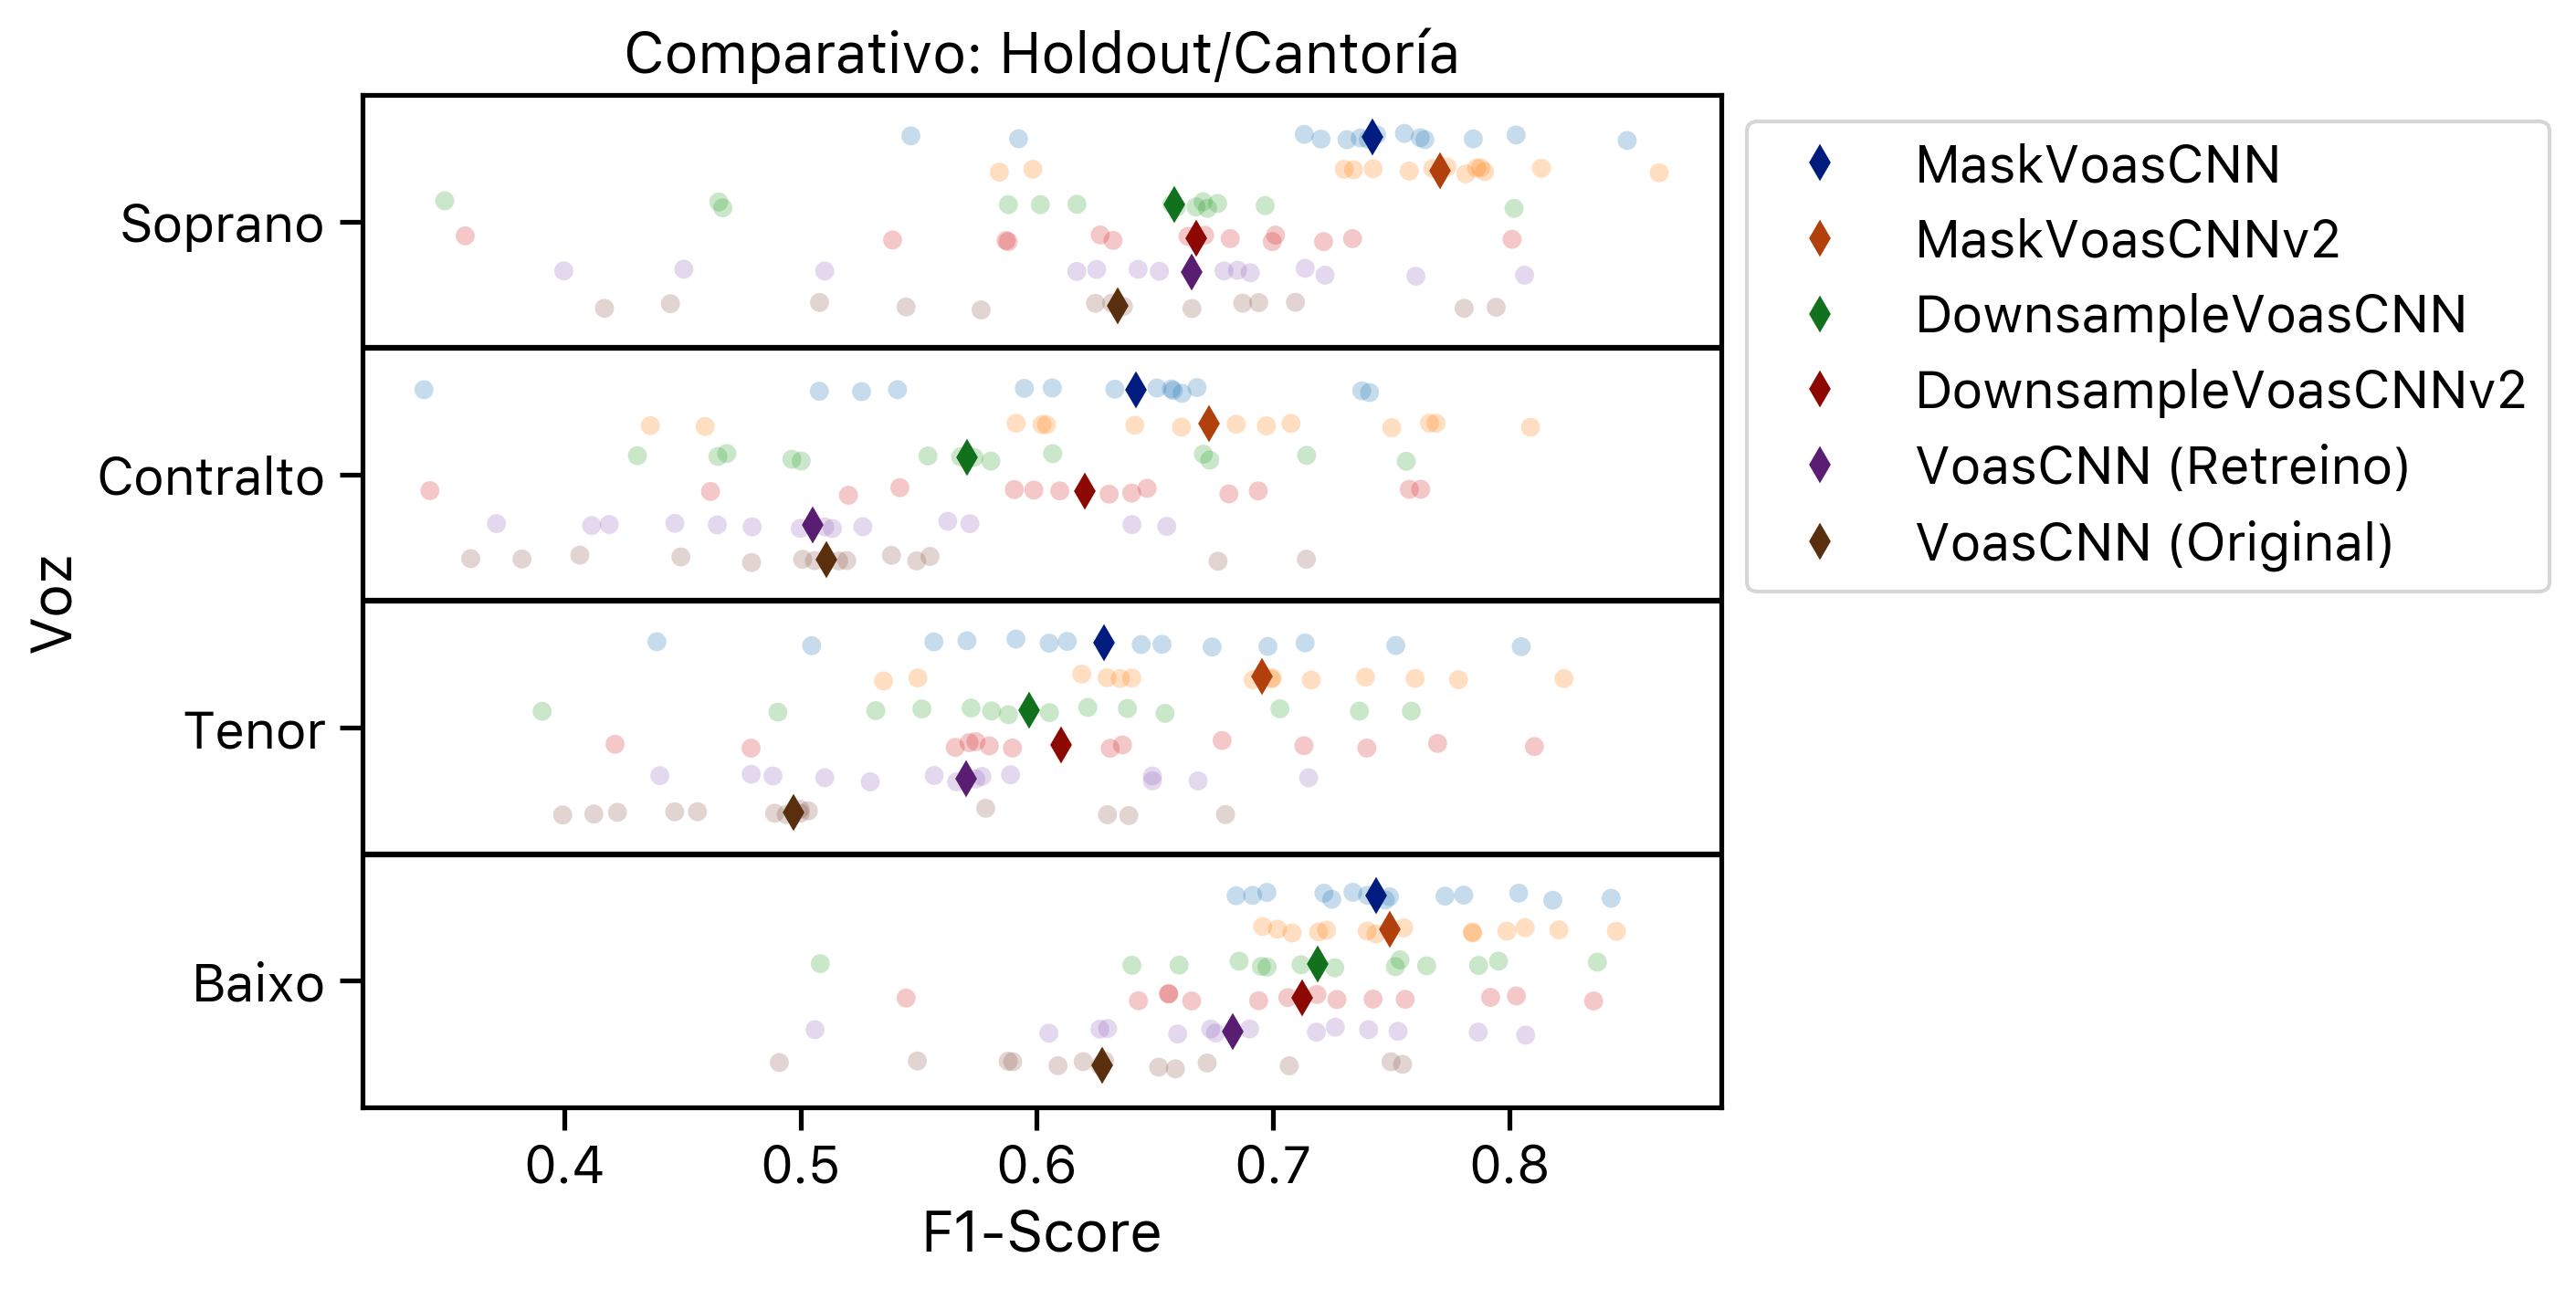

In [19]:
fig, ax = plt.subplots()

ax.set_title('Comparativo: Holdout/Cantoría')

strip = sns.stripplot(
    data=holdout_cantoria_metrics, x="F1-Score", y="Voz", hue="Modelo",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

point = sns.pointplot(
    data=holdout_cantoria_metrics, x="F1-Score", y="Voz", hue="Modelo",
    dodge=.67, palette="dark", errorbar=None, estimator='median',
    markers="d", markersize=4, linestyle="none",
)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

point.axhline(0.5, c='black')
point.axhline(1.5, c='black')
point.axhline(2.5, c='black')